### Overview

In this assignment, you are required to: - Implement multiple classification models -
Build an interactive Streamlit web application to demonstrate your models - Deploy
the app on Streamlit Community Cloud (FREE) - Share **clickable links for evaluation**
You will learn real-world end-to-end ML deployment workflow: modeling,
evaluation, UI design, and deployment.

The assignment has to be performed on BITS Virtual Lab. If you are still facing any
issue with this, please send an email to neha.vinayak@pilani.bits-pilani.ac.in with
subject as “ML Assignment 2: BITS Lab issue” and get it resolved at the earliest

### Mandatory Submission Links
Each submission must be a single PDF file with the following (maintain the order):
- GitHub Repository Link containing
    - Complete source code
    - requirements.txt
    - A clear README.md
- Live Streamlit App Link
    - Deployed using Streamlit Community Cloud
    - Must open an interactive frontend when clicked
- Screenshot
    - Upload screenshot of assignment execution on BITS Virtual Lab
- The Github README content (details mentioned in Section 3 - Step 5) should also be part of the submitted PDF file.

As you are comfortable with the BITS Virtual Lab and Taxila Assignment submission process now, only ONE submission will be accepted in Assignment 2. No Resubmission requests will be accepted.

### Step 1: Dataset choice
Choose ONE classification dataset of your choice from any public repository -Kaggle or UCI. It may be a binary classification problem or a multi-class classification problem.

Minimum Feature Size: 12

Minimum Instance Size: 500

#### Dataset: Breast Cancer Wisconsin (Diagnostic) [https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic]
#### Number of instances: 569
#### Number of features: 30

### Step 2: Machine Learning Classification models and Evaluation metrics
Implement the following classification models using the dataset chosen above. All the 6 ML models have to be implemented on the same dataset.

1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor Classifier
4. Naive Bayes Classifier - Gaussian or Multinomial
5. Ensemble Model - Random Forest
6. Ensemble Model - XGBoost
   
For each of the models above, calculate the following evaluation metrics:

1. Accuracy
2. AUC Score
3. Precision
4. Recall
5. F1 Score
6. Matthews Correlation Coefficient (MCC Score)
   
The assignment has to be performed on BITS Virtual Lab and a (ONE) screenshot has to be uploaded as a proof of that. [ 1 mark ]

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
y = y['Diagnosis'].map({'M': 1, 'B': 0}).values

# metadata 
print(X.head()) 
  


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preprocessing - Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=56)


In [30]:
import joblib
import pickle

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Implementation and Evaluation
# To store model evaluation
results = []
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    filename = f"{name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")
    
    # Calculate Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC Score": roc_auc_score(y_test, y_proba),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC Score": matthews_corrcoef(y_test, y_pred)
    })

# Display Results
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))
with open('model_evaluation_metrics.pkl', 'wb') as f:
    pickle.dump(df_results, f)

Saved Logistic Regression to logistic_regression.pkl
Saved Decision Tree to decision_tree.pkl
Saved K-Nearest Neighbor to k-nearest_neighbor.pkl
Saved Naive Bayes (Gaussian) to naive_bayes_(gaussian).pkl
Saved Random Forest to random_forest.pkl
Saved XGBoost to xgboost.pkl
                 Model  Accuracy  AUC Score  Precision   Recall  F1 Score  MCC Score
   Logistic Regression  0.982456   1.000000   0.958333 1.000000  0.978723   0.964441
         Decision Tree  0.947368   0.952366   0.900000 0.978261  0.937500   0.894495
    K-Nearest Neighbor  0.973684   0.995364   0.977778 0.956522  0.967033   0.945298
Naive Bayes (Gaussian)  0.973684   0.999041   0.957447 0.978261  0.967742   0.945680
         Random Forest  0.964912   0.997442   0.937500 0.978261  0.957447   0.928227
               XGBoost  0.973684   0.998721   0.957447 0.978261  0.967742   0.945680


/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:39:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Step 3: Prepare Your GitHub Repository
Your repository must contain:

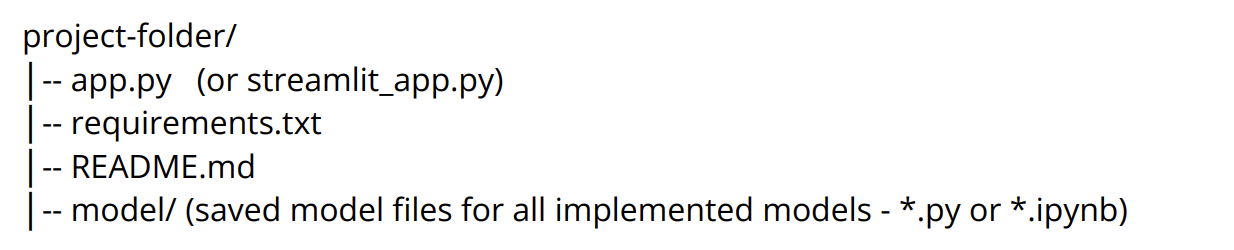

### Step 4: Create requirements.txt

Missing dependencies are the #1 cause of deployment failure.

### Step 5: README.md with the following structure. This README content should alsobe part of the submitted PDF file. Follow the required structure carefully.
1. Problem statement
2. Dataset description [ 1 mark ]
3. Models used: [ 6 marks - 1 marks for all the metrics for each model ]

Make a Comparison Table with the evaluation metrics calculated for all the 6 models as below:

### Step 6: Deploy on Streamlit Community Cloud
1. Go to https://streamlit.io/cloud
2. Sign in using GitHub account
3. Click “New App”
4. Select your repository
5. Choose branch (usually main)
6. Select app.py
7. Click Deploy

Within a few minutes, your app will be live.

Your Streamlit app must include at least the following features : -

    a. Dataset upload option (CSV) [As streamlit free tier has limited capacity,
    upload only test data] [ 1 mark ]
    
    b. Model selection dropdown (if multiple models) [ 1 mark ]
    
    c. Display of evaluation metrics [ 1 mark ]
    
    d. Confusion matrix or classification report [ 1 mark ]